In [2]:
from pathlib import Path
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

# import sys
# sys.path.append('.')
import incense
from incense import ExperimentLoader
# from dotenv import load_dotenv
import os

In [70]:
def set_style():
    # This sets reasonable defaults for font size for a figure that will go in a paper
    sns.set_context("paper")
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    # Make the background white, and specify the specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })
set_style()
latex_path = Path('..')/'idetc19-latex'/'img'

In [13]:
# uri = 'mongodb://{}:{}@localhost:27017/?authMechanism=SCRAM-SHA-1'.format(
#     os.environ["MONGO_INITDB_ROOT_USERNAME"],
#     os.environ["MONGO_INITDB_ROOT_PASSWORD"]
# )

uri = 'localhost:27017'

loader = ExperimentLoader(
    mongo_uri=uri,
    db_name='sacred'
)

In [403]:
exp = loader.find_by_id(115)
# exp = loader.find_by_id(54)
# exp = loader.find_by_id(18)
exp.artifacts

{'true_adj.npy': Artifact(name=true_adj.npy),
 'true_G.png': Artifact(name=true_G.png),
 'cosine_adj.npy': Artifact(name=cosine_adj.npy),
 'init_adj.npy': Artifact(name=init_adj.npy),
 'invite_adj.npy': Artifact(name=invite_adj.npy),
 'estimate_mat_comparison.png': Artifact(name=estimate_mat_comparison.png),
 'invite_knee.png': Artifact(name=invite_knee.png),
 'invite_knee_graph.png': Artifact(name=invite_knee_graph.png),
 'invite_f-score_graph.png': Artifact(name=invite_f-score_graph.png),
 'invite_pathfinder_graph.png': Artifact(name=invite_pathfinder_graph.png),
 'cosine_knee.png': Artifact(name=cosine_knee.png),
 'cosine_knee_graph.png': Artifact(name=cosine_knee_graph.png),
 'cosine_f-score_graph.png': Artifact(name=cosine_f-score_graph.png),
 'cosine_pathfinder_graph.png': Artifact(name=cosine_pathfinder_graph.png),
 'p_vs_r.png': Artifact(name=p_vs_r.png)}

In [366]:
A = exp.artifacts['true_adj.npy']#.as_type(incense.artifact.PickleArtifact)
# A.show()
# comp_fig = exp.artifacts['estimate_mat_comparison.png'].as_type(incense.artifact.PNGArtifact)
# comp_fig.show(figsize=(12, 6));
# fig.show();
# plt.savefig(latex_path/f'comparison_{exp.config.nwos}x{exp.config.nitems}-drivetrain.png')
# plt.show()

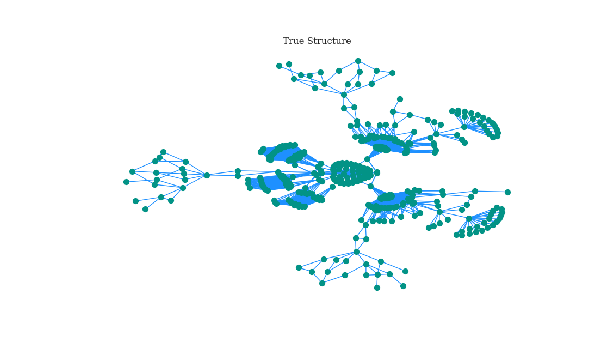

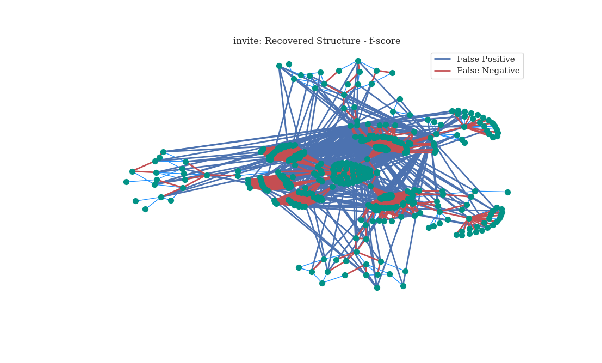

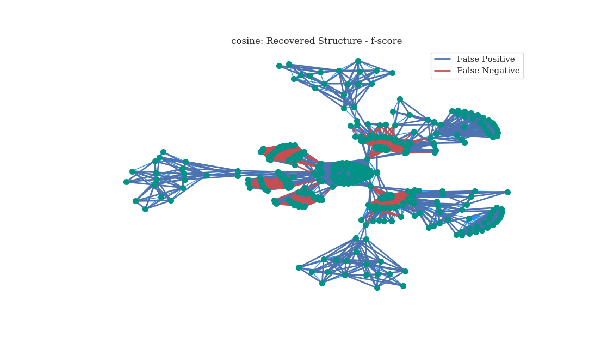

In [383]:

graphs = [
    'true_G.png',
    'invite_f-score_graph.png',
    'cosine_f-score_graph.png'
]
for graph in graphs:
    fig = exp.artifacts[graph].as_type(incense.artifact.PNGArtifact)
    fig.show(figsize=(12, 6));
# fig.show();
# plt.savefig(latex_path/f'comparison_{exp.config.nwos}x{exp.config.nitems}-drivetrain.png')

In [1]:

current_palette = sns.color_palette()[:2]
sns.set_palette(current_palette)

ivt = exp.info['invite']['supervised']
aps_ivt = ivt['aps']
r_ivt = ivt['recall']['values']
# _run.log_scalar('invite_avg_precision_score', aps_ivt)

cos = exp.info['cosine']['supervised']
aps_cos = cos['aps']

r_ivt, r_cos = ivt['recall']['values'], cos['recall']['values']
p_ivt, p_cos = ivt['precision']['values'], cos['precision']['values']
t_ivt, t_cos = ivt['thres']['values'], cos['thres']['values']
ivt_opt_pos = np.argmax(ivt['fscores']['values'])
cos_opt_pos = np.argmax(cos['fscores']['values'])
# r_ivt, r_cos = ivt['recall']['values'], cos['recall']['values']

plt.figure()


f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('$F_1$={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')

plt.step(r_ivt, p_ivt, alpha=0.2, where='post')
plt.step(r_cos, p_cos, alpha=0.2, where='post', 
         linestyle=':', zorder=-1)

plt.fill_between(r_ivt, p_ivt, alpha=0.5, step='post', label='INVITE')
plt.fill_between(r_cos, p_cos, alpha=0.5, step='post',
                 hatch='/// ',label='Cosine')

plt.scatter(r_ivt[ivt_opt_pos], p_ivt[ivt_opt_pos])
plt.annotate(f'$\sigma={t_ivt[ivt_opt_pos]:.2e}$', 
             (r_ivt[ivt_opt_pos]+ 0.02, p_ivt[ivt_opt_pos]+ 0.02))

plt.scatter(r_cos[cos_opt_pos], p_cos[cos_opt_pos])
plt.annotate(f'$\sigma={t_cos[cos_opt_pos]:.2f}$', 
             (r_cos[cos_opt_pos]+ 0.02, p_cos[cos_opt_pos]+ 0.02))

plt.title(f'{exp.config.model}\n'+
          f'APS (INVITE) = {aps_ivt:.3f}   ' +
          f'APS (Cosine) = {aps_cos:.3f}\n')
# plt.legend(loc=0)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(0,1)
plt.ylim(0,1)
sns.despine()
plt.tight_layout()
plt.savefig(latex_path/f'p_vs_r_{exp.config.nwos}x{exp.config.nitems}-{exp.config.model}.png')
# ex.add_artifact(tmp/'p_vs_r.png')

NameError: name 'sns' is not defined

In [60]:
def get_exps():
    n_exps = 144
    fscore_mppr = {'supervised':'_opt', 'unsupervised':'_knee', 'pathfinder':'_pf'}
    thres_mppr = {'supervised':'thres_opt', 'unsupervised':'knee', 'pathfinder':'blah'}
    for idx in range(n_exps):
        exp = loader.find_by_id(idx+3)
        cfg = exp.config
        for kind in ['cosine', 'invite']:
            for meth in ['supervised', 'unsupervised', 'pathfinder']:
                info = exp.info[kind][meth]
                d = dict(
                    expID=idx,
                    system=cfg.model,
                    wo_length=cfg.nitems,
                    samples=cfg.nwos,
                    method=kind,
                    context=meth,
                    F1 = info.get('fscore'+fscore_mppr[meth], np.nan),
                    thres=info.get(thres_mppr[meth], np.nan),
                    aps = info.get('aps', np.nan)
                    
                )
                yield d 

In [61]:
data = get_exps()
df = pd.DataFrame(data)

    
    

In [204]:
df.head()
df[mask].head()

,F1,aps,context,expID,method,samples,system,thres,wo_length
18,0.571429,0.324174,supervised,3,cosine,10,drivetrain,0.737865,3
19,0.535714,NaN,unsupervised,3,cosine,10,drivetrain,0.369444,3
21,0.634921,0.596738,supervised,3,invite,10,drivetrain,0.159095,3
22,0.615385,NaN,unsupervised,3,invite,10,drivetrain,0.147222,3
24,0.049056,0.030181,supervised,4,cosine,10,aircraft,0.000000,3


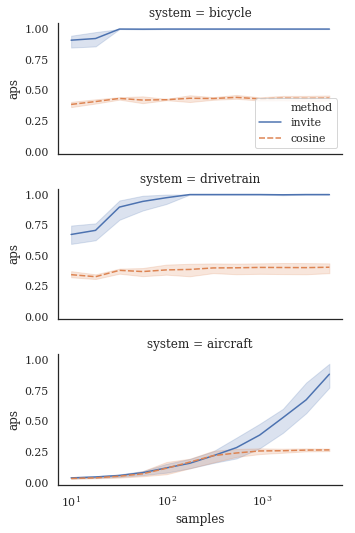

In [201]:
mask =  (df.context!='pathfinder') & (df.wo_length!=2)

sns.relplot(
    x='samples', y='aps', 
    hue='method', hue_order=['invite', 'cosine'], 
    style='method', style_order=['invite', 'cosine'], 
    row='system', row_order=['bicycle', 'drivetrain', 'aircraft'],
    facet_kws=dict(legend_out=False),
    data=df[mask], kind='line', height=2.5, aspect=2
)
plt.xscale('log')
plt.savefig(latex_path/'avg-p-scores.png')

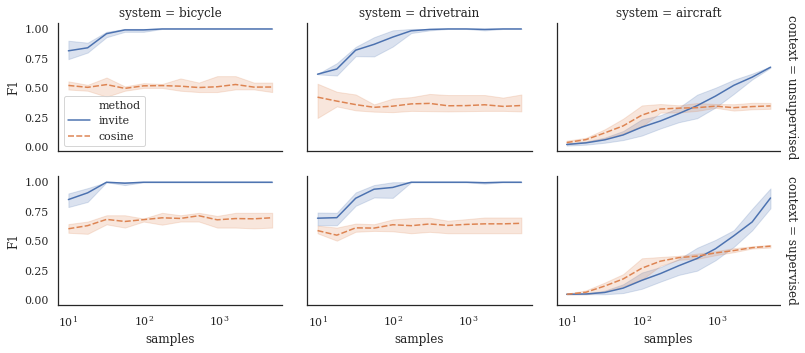

In [197]:
p = sns.relplot(
    x='samples', y='F1',
    hue='method',   hue_order=['invite', 'cosine'], 
    style='method', style_order=['invite', 'cosine'], 
    col='system',   col_order=['bicycle', 'drivetrain', 'aircraft'],
    row='context',  row_order=['unsupervised', 'supervised'],
    data=df[mask], kind='line', 
    facet_kws=dict(margin_titles=True,legend_out=False),
    height=2.5, aspect=1.5
)
# p.fig.set_size_inches(10,5)
plt.xscale('log')
plt.savefig(latex_path/'f1-scores.png')


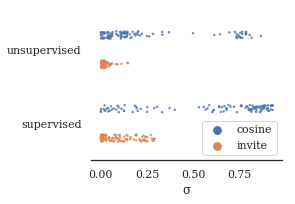

In [311]:
sns.catplot(x='thres', y='context', hue='method', 
#             row='context', row_order=['unsupervised', 'supervised'],
            data=df[mask], 
            order=['unsupervised', 'supervised'],
            dodge=True,
            alpha=.8,
#             kind='swarm',
#             size='F1',
#             facet_kws=dict(size='F1'),
            height=3., aspect=1.5, s=2.5, legend_out=False, legend=False)
plt.legend(loc=0)
plt.xlabel('σ')
plt.ylabel(None)
sns.despine(left=True)
# plt.suptitle('Thresholding for Optimal $F_1$-score')
plt.savefig(latex_path/'thres-compare.png', dpi=300)


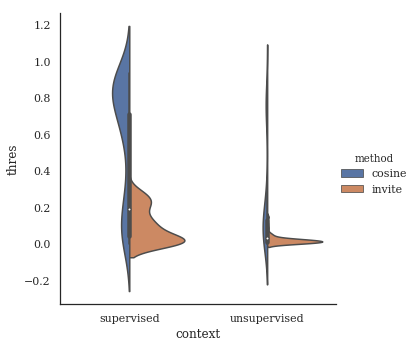

In [278]:
sns.catplot(y='thres', x='context',data=df[mask], 
            hue='method', split=True, kind='violin'
#             row='context',size='F1', sizes=(5,100)
             )
# plt.xscale('log')
# sns.jointplot(df[mask&(df.method=='invite')].thres, df[mask&(df.method=='cosine')].thres, kind='hex')

In [72]:
df.to_csv(Path('..')/'experiment_results.csv')